In [1]:
# Decision Tree

In [3]:
# 임포트
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft, ifft
import IPython
import os
import numpy as np
import librosa, librosa.display
import random
import pandas as pd

%matplotlib inline

In [4]:
def normalization(x):
    x_n = x

    length = len(x_n)

    temp_absmax = 0
    temp_max = x[0]
    temp_min = x[0]

    for j in range(0, length):
        norm_file = list()
        
        temp_max = np.maximum(x[j], temp_max)

        temp_min = np.minimum(x[j], temp_min)

        temp_absmax = np.maximum(temp_max, abs(temp_min))        

    norm_file = x / temp_absmax

    return norm_file        

In [5]:
# stft sum
def stft_sum(x):
    D = np.abs(librosa.stft(x, dtype='float32', 
                            hop_length=100, 
                            win_length=100))
    a = D.sum(axis=1)
    return a


In [6]:
# divide_2
def divide_fourier_2(number, divide_number):
    D = np.abs(librosa.stft(np.asarray(number, dtype='float32'), 
                            hop_length=len(number) // (divide_number - 1))) / 1000
    return np.array(D)

In [7]:
# divide
def divide_fourier(number, divide_number):
    D = np.abs(librosa.stft(np.asarray(number, dtype='float32'), 
                            hop_length=len(number) // (divide_number - 1), 
                            win_length=len(number) // (divide_number - 1))) / 1000
    return np.array(D)

In [8]:
# probability density funtion

def PBF(value, mus, sig):
    return 1 / (np.sqrt(2 * np.pi * (sig**2))) * np.exp(-((value-mus) ** 2) / 2 * (sig ** 2))

In [9]:
# z function

def ZF(value, _mus, _sig):
    X = (value - _mus) / _sig
    mus = 0
    sig = 1
    return 1 / (np.sqrt(2 * np.pi * (sig**2))) * np.exp(-((X-mus) ** 2) / 2 * (sig ** 2))

In [10]:
# detect pitch

def detect_pitch(x):
    """
    params:
        x : Array
    return:
        a list of pitches
    """
    
    pitches = np.empty((1, 2))
    for i in range(1, len(x) - 1):
        if x[i - 1] < x[i] and x[i] > x[i + 1]:
            pitches = np.concatenate((pitches, [[i, x[i]]]), axis=0)
            
    return pitches[1:,]

In [11]:
# slicing

def slicing(value):
    x_start = list()
    x_end = list()
    list_len = list()
    #임계값
    set_value = 0.04

    a = value
    list_len.append(len(a))

    # x축의 시작점
    a = value

    for j in range (len(a)):    
        if  a[j] > set_value:
            x_start.append(j)      
            break

    
    a = value
    j=1  
    for j in range (len(a)):    
        if  a[-j] > set_value:
            x_end.append(len(a)-j)      
            break

    cutted_file = list()

    a = value

    # x축 시작점과 x축 끝점을 슬라이싱  
    cutted_file = a[ x_start[0] : x_end[0] ]  
    return cutted_file

In [12]:
from pylab import*
import numpy as np

#def waveFeature(wfile):
#    sampFreq, snd = wavfile.read(wfile)
def waveFeature(sample_rate,list):
    sampFreq, snd = sample_rate,list
      
    snd = snd / (2.**15)    
    
    n = len(snd) 
    
    p = fft(snd) # take the fourier transform 
    
    nUniquePts = int(ceil((n+1)/2.0))
    p = p[0:nUniquePts]
    p = abs(p)
    p = p / float(n) # scale by the number of points so that
                 # the magnitude does not depend on the length 
                 # of the signal or on its sampling frequency 
        
    p = p**2  # square it to get the power 

    # multiply by two (see technical document for details)
    # odd nfft excludes Nyquist point
    
    if n % 2 > 0: # we've got odd number of points fft
        p[1:len(p)] = p[1:len(p)] * 2
    else:
        p[1:len(p) -1] = p[1:len(p) - 1] * 2 # we've got even number of points fft

    freqArray = arange(0, nUniquePts, 1.0) * (sampFreq / n)
    #freqArray = freqArray / 1000
    
    p=10*log10(p)
    return freqArray, p
  

'''
plt.figure(figsize=(15, 3)) << 15,3 부분에 해당하는 인자를 조정하면 그래프의 크기를 조정할 수 있음
freqArray, p=waveFeature('sample_data/three.wav') <<  '경로' 부분에 해당하는 인자를 조정할 수 있음
xlim([3000 ,4000]) << 인자를 통한 x축의 범위 조정할 수 있음
ylim([-110 ,-40]) << 인자를 통한 y축의 범위 조정할 수 있음
'''


#주파수 뽑기
#print("주파수:", freqArray)
#print(freqArray.shape)
#print("power:", p)
#print(p.shape)

#특정 주파수 뽑기
#print(freqArray[100])
#print(p[100])

"\nplt.figure(figsize=(15, 3)) << 15,3 부분에 해당하는 인자를 조정하면 그래프의 크기를 조정할 수 있음\nfreqArray, p=waveFeature('sample_data/three.wav') <<  '경로' 부분에 해당하는 인자를 조정할 수 있음\nxlim([3000 ,4000]) << 인자를 통한 x축의 범위 조정할 수 있음\nylim([-110 ,-40]) << 인자를 통한 y축의 범위 조정할 수 있음\n"

In [13]:
# 함수 설명
#  start_range, end_ragne 인자를 통한 범위내의 데시벨 평균값을 return 합니다.
#
# example

# 500~1000 주파수 구간의 데시벨 평균값을 저장하여 return해줌
# a=total_fury(500,1000)

# 아래의 두 수식을 통해 최대,최소값을 뽑아낼 수 있음
# print(max(a)) 
# print(min(a))
def total_fury(start_range,end_range,iterate):
    
    freqArray, p=waveFeature(8000, x[iterate])
    #시작점
    freqArray_start = 0
    #끝점
    freqArray_end = 0

    for j in range(0,len(freqArray)):
      if(freqArray[j] > start_range):
        freqArray_start = j
        break

    for j in range(0,len(freqArray)):
      if(freqArray[j] > end_range):
        freqArray_end = j
        break

    sum = 0.0
    for j in range(freqArray_start,freqArray_end):
      sum=p[j] + sum

    average = sum/(freqArray_end-freqArray_start)    
    
    return average

a=total_fury(500,1000,30)

print(a)

#2의 데이터 -90 ~ -81
#5의 데이터 -71 ~ -62

NameError: name 'x' is not defined

In [25]:
def total_fury_2(start_range, end_range, value):
    
    freqArray, p=waveFeature(8000, value)
    #시작점
    freqArray_start = 0
    #끝점
    freqArray_end = 0

    for j in range(0,len(freqArray)):
        if(freqArray[j] > start_range):
            freqArray_start = j
            break

    for j in range(0,len(freqArray)):
        if(freqArray[j] > end_range):
            freqArray_end = j
            break

    sum = 0.0
    for j in range(freqArray_start,freqArray_end):
        sum=p[j] + sum

    average = sum/(freqArray_end-freqArray_start)    
    
    return average

In [26]:
for i in range(len(x)):
  if i > 60 and i < 180:
    continue
  if i > 210:
    continue
  a= total_fury(800,1000,i)
  if a > -71:
      print("0 입니다")
      #print(a)
  else:
      a= total_fury(2500,3500,i)
      
      if a > -70:
        print("1 입니다 ")
        #print(a)
      else:
        print("6 입니다")
        #print(a)

NameError: name 'x' is not defined

In [27]:
def zero_classification(value):
    """
    1, 6: 0
    0: 1
    """
    disicion_boundary = -71
    res = total_fury_2(800, 1000, value)
    if res < disicion_boundary:
        return 0
    else:
        return 1

In [28]:
def one_six_classification(value):
    """
    1: 0
    6: 1
    """
    
    disicion_boundary = -70
    res = total_fury_2(2500, 3500, value)
    if res > disicion_boundary:
        return 0
    else:
        return 1

In [29]:
numbers = [0, 1, 6]
for i in numbers:
    for j in range(30):
        res = zero_classification(rnd_data[i * 30 + j])
        print(i, res)

0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0


In [30]:
numbers = [1, 6]
for i in numbers:
    for j in range(30):
        res = one_six_classification(rnd_data[i * 30 + j])
        print(i, res)

1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1


In [31]:
for i in range(210,270):
  
  a= total_fury(800,1200,i)               
  if a > -70:        
    print("8 입니다")
  else:        
    print("7 입니다 ")

NameError: name 'x' is not defined

In [32]:
def seven_eight_classification(value):
    """
    7 : 0
    8 : 1
    """
    
    disicion_boundary = -70
    res = total_fury_2(800, 1200, value)
    if res < disicion_boundary:
        return 0
    else:
        return 1

In [33]:
numbers = [7, 8]
for i in numbers:
    for j in range(30):
        res = seven_eight_classification(rnd_data[i * 30 + j])
        print(i, res)

7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1


In [34]:
# load raw_data
raw_data = np.load("raw_data.npy")
raw_label = np.load("raw_label.npy")

In [35]:
# load rnd_data
rnd_data = np.load("new_data.npy")
rnd_label = np.load("new_label.npy")

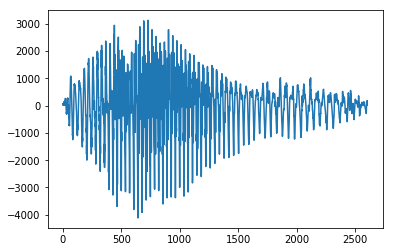

In [36]:
plt.plot(slicing(rnd_data[1]))

In [37]:
rnd_data.shape

(300, 4000)

In [38]:
# norm
norm_data = []
for r in raw_data:
    norm_data.append(normalization(r))

In [39]:
# norm rnd data
norm_rnd_data = []
for r in rnd_data:
    norm_rnd_data.append(normalization(r))
    
norm_rnd_data = np.array(norm_rnd_data)

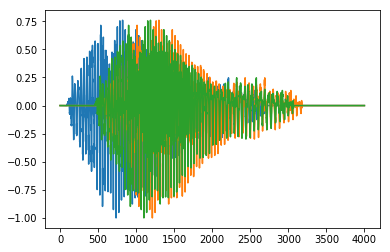

In [42]:
plt.plot(norm_rnd_data[0])
plt.plot(norm_rnd_data[1])
plt.plot(norm_rnd_data[2])

(array([1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 7.000e+00,
        8.000e+00, 8.000e+00, 6.000e+00, 5.000e+00, 8.000e+00, 6.000e+00,
        1.300e+01, 1.400e+01, 1.100e+01, 1.600e+01, 2.900e+01, 2.800e+01,
        4.300e+01, 5.100e+01, 7.000e+01, 8.000e+01, 7.300e+01, 7.700e+01,
        9.600e+01, 1.010e+02, 1.180e+02, 1.570e+02, 1.623e+03, 2.440e+02,
        2.470e+02, 2.170e+02, 1.410e+02, 9.900e+01, 6.900e+01, 5.900e+01,
        5.300e+01, 3.900e+01, 3.900e+01, 3.600e+01, 2.500e+01, 2.900e+01,
        1.100e+01, 1.200e+01, 1.100e+01, 2.000e+00, 4.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00]),
 array([-1.        , -0.96481108, -0.92962216, -0.89443324, -0.85924432,
        -0.8240554 , -0.78886648, -0.75367756, -0.71848864, -0.68329972,
        -0.6481108 , -0.61292188, -0.57773296, -0.54254404, -0.50735512,
        -0.4721662 , -0.43697728, -0.40178836, -0.36659944, -0.33141052,
        -0.2962216 , -0.26103268, -0.22584376, -0.19065484, -0.15546592,
        -0.

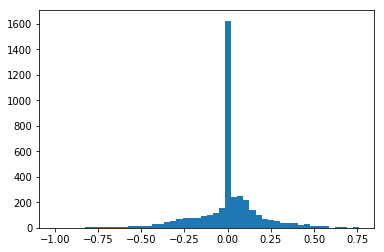

In [67]:
plt.hist(norm_rnd_data[0], bins=50)

<BarContainer object of 10 artists>

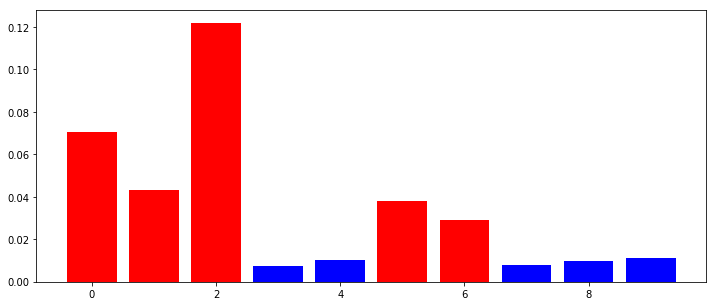

In [68]:
vowel = ['r', 'r', 'r', 'b', 'b', 'r', 'r', 'b', 'b', 'b']
number = range(10)

fourier_max = []
for r in norm_data:
    fourier_max.append(divide_fourier(r, 3)[:200, 0].max())
plt.figure(figsize=(12, 5))
plt.bar(number, fourier_max, color=vowel)


/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]]


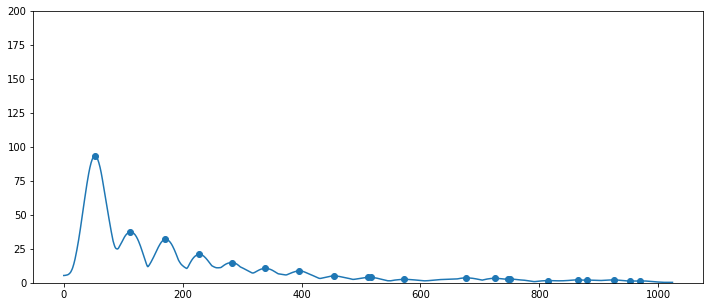

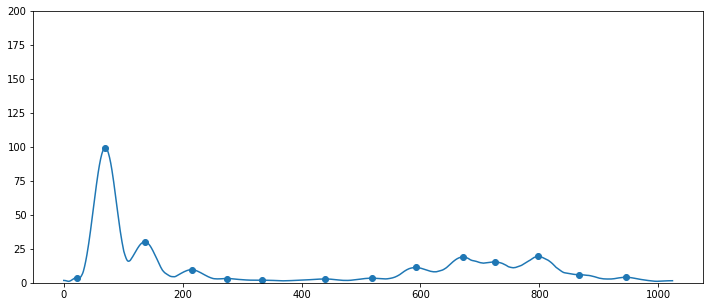

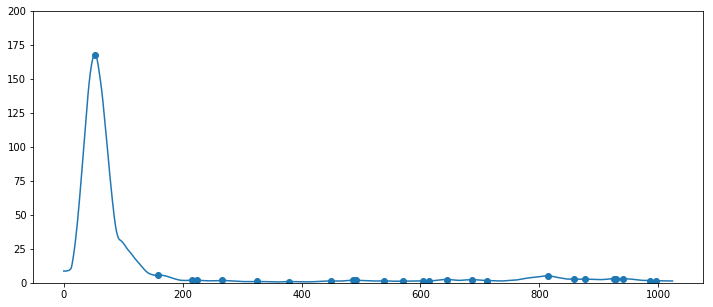

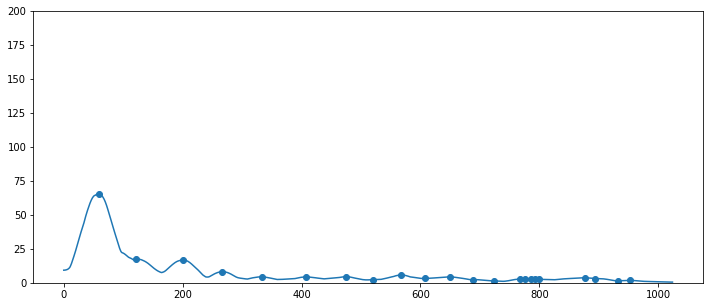

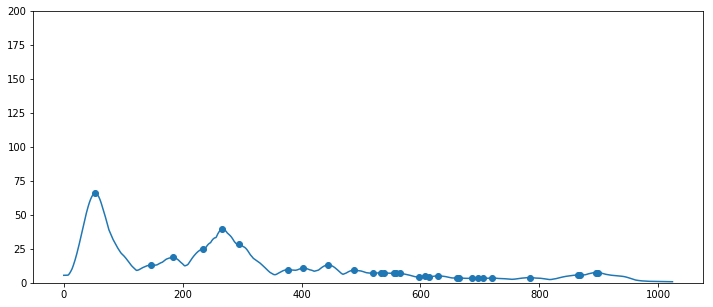

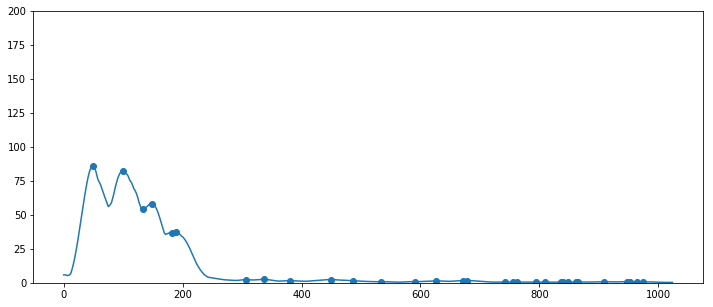

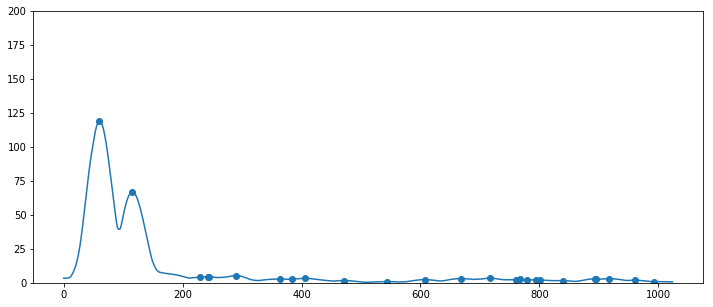

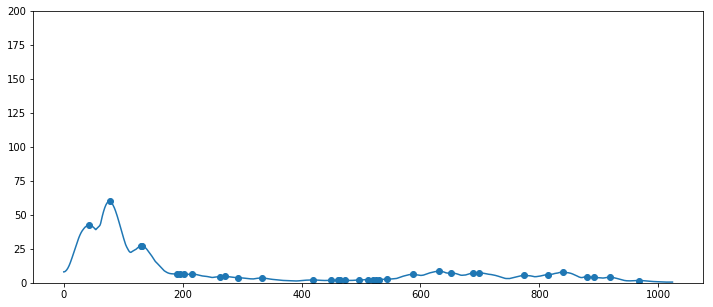

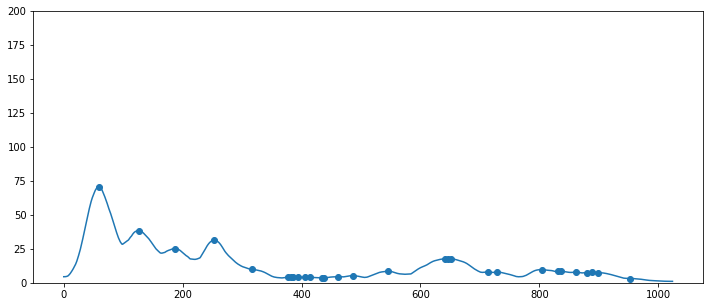

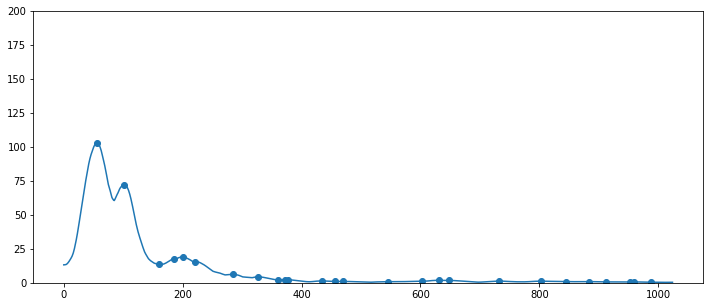

In [51]:
for i in range(10):
    plt.figure(figsize=(12, 5))
    plt.ylim([0, 200])
    plt.plot(stft_sum(norm_data[i]))
    plt.scatter(detect_pitch(stft_sum(norm_data[i]))[:, 0], detect_pitch(stft_sum(norm_data[i]))[:, 1])


In [40]:
def vowel_classication(value):
    """ 
        over disicion boundary return : 1
        under disicion boundary return : 0
    """
    
    dicision_boundary = 0.02
    
    res = divide_fourier(value, 3)[:200, 0].max()
    if res > dicision_boundary:
        return 1
    else:
        return 0

In [63]:
for i in range(10):
    print(i, vowel_classication(norm_data[i]))

0 1
1 1
2 1
3 0
4 0
5 1
6 1
7 0
8 0
9 0


In [64]:
for i in range(10):
    for j in range(30):
        print(i, vowel_classication(slicing(normalization(rnd_data[30 * i + j]))))

0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
6 1
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0


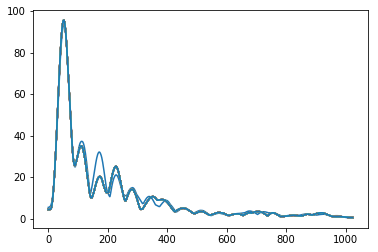

In [65]:
number = 0
plt.plot(stft_sum(norm_data[number]))
for i in range(30):
    plt.plot(stft_sum(slicing(normalization(rnd_data[30 * number + i]))))

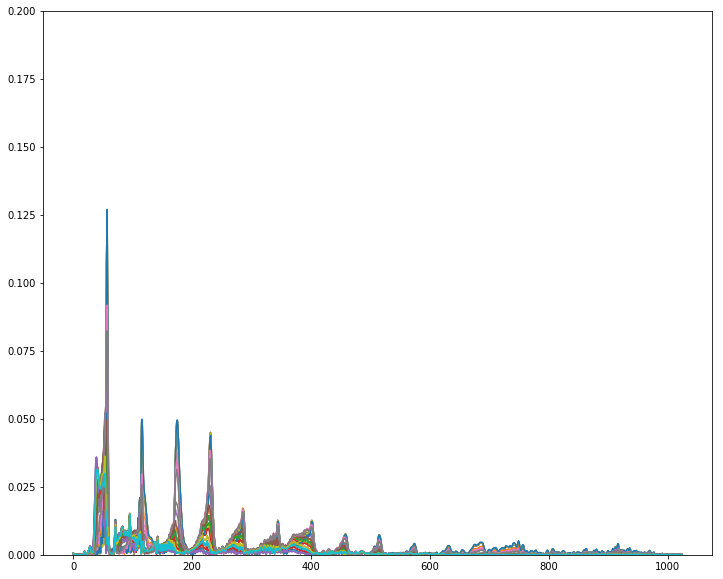

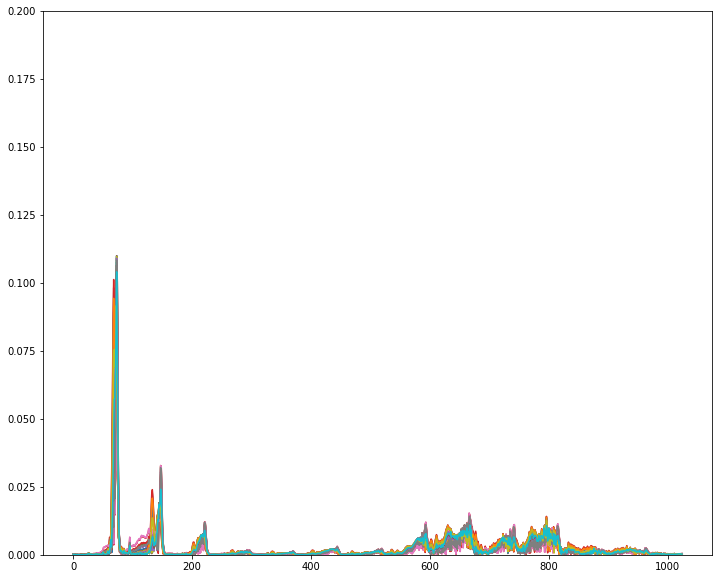

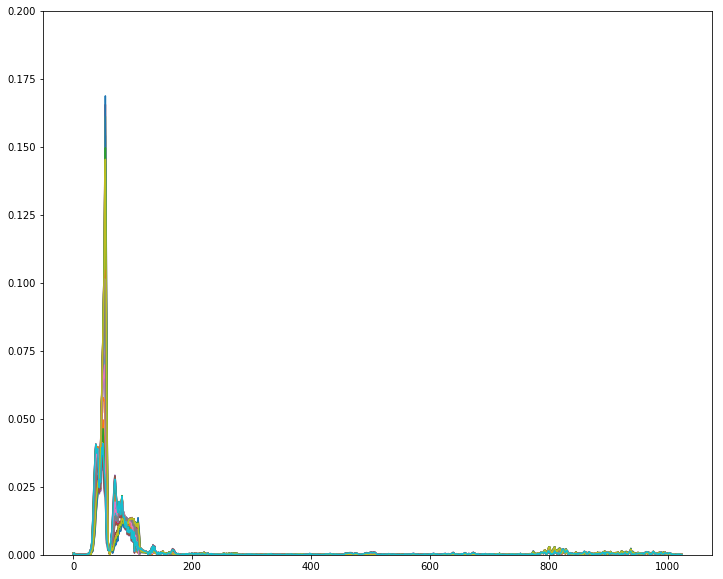

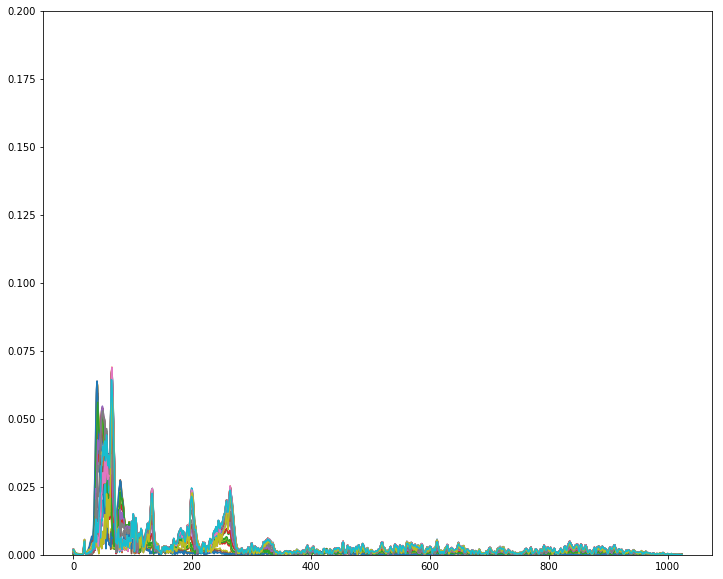

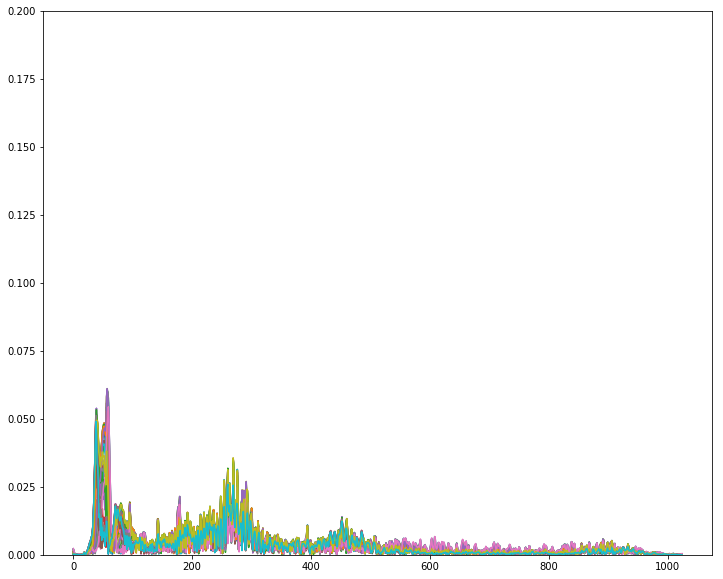

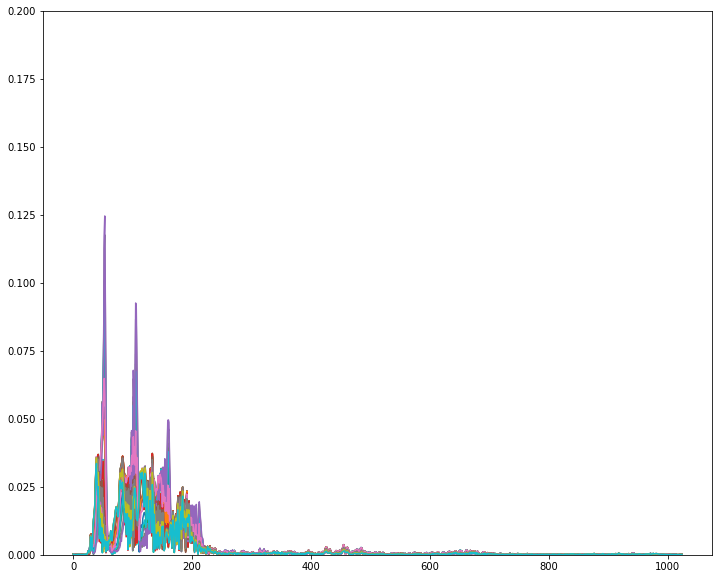

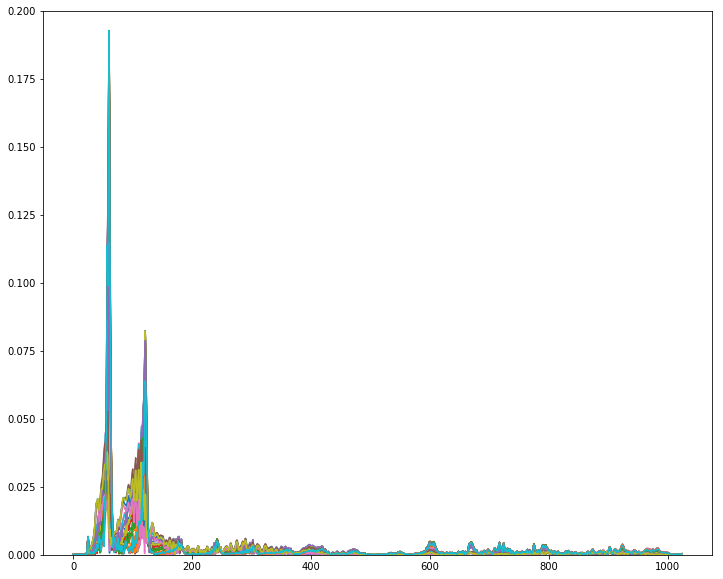

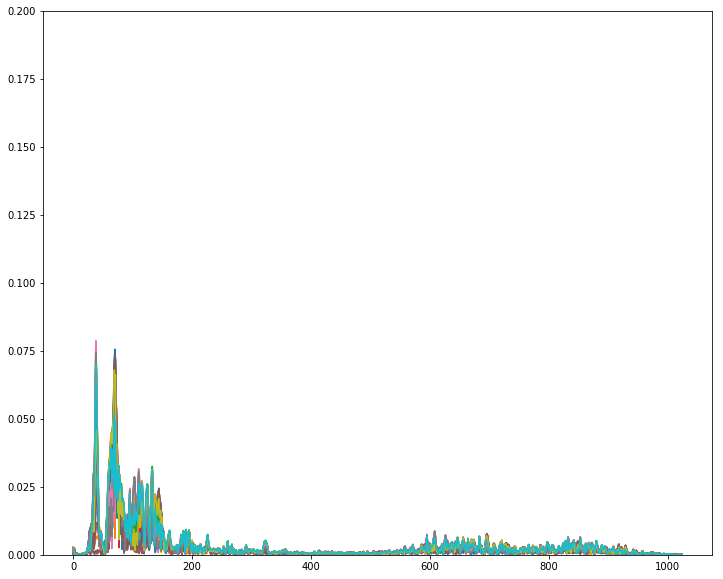

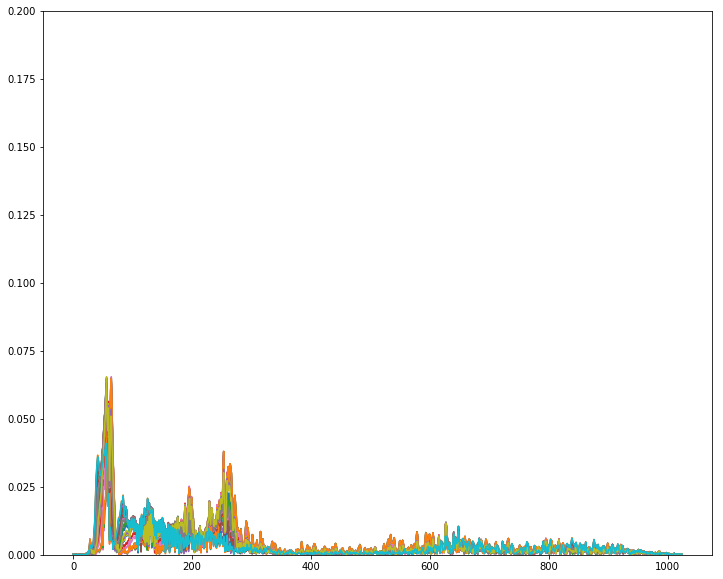

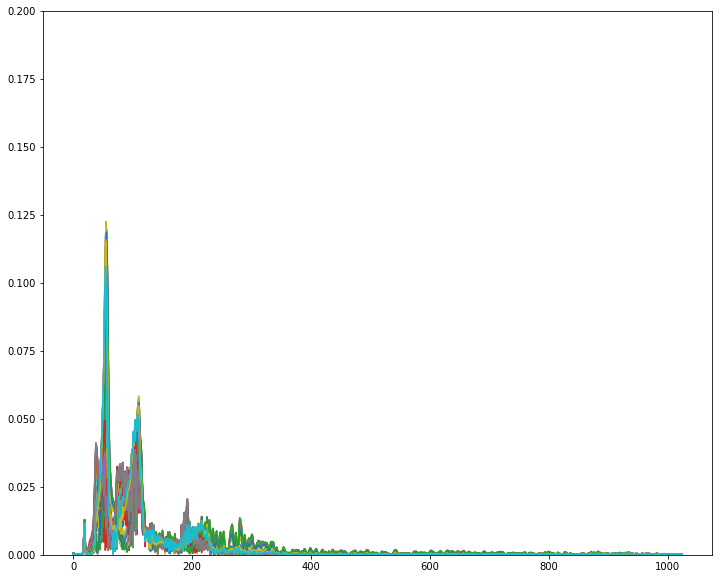

In [52]:
for i in range(10):
    plt.figure(figsize=(12,10))
    plt.ylim([0, 0.2])
    for j in range(30):
        plt.plot(divide_fourier(normalization(rnd_data[30 * i + j]), 3)[:, 1])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5a4f8cf4e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5a4f8cf5c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5a4f8cfdd8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5a47a04a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5a47a49e48>,
 'means': [<matplotlib.lines.Line2D at 0x7f5a47a04208>,
  <matplotlib.lines.Line2D at 0x7f5a477abc50>]}

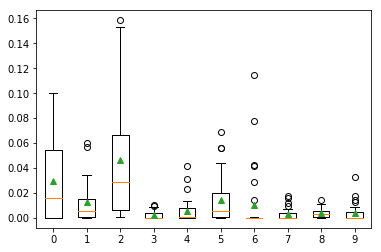

In [54]:
a = []
for i in range(10):
    #plt.ylim([0, 0.2])
    b = []
    for j in range(30):
        b.append(divide_fourier(normalization(rnd_data[30 * i + j]), 3)[:, 0].max())
    a.append(b)
    
plt.boxplot(a, labels=range(10), showmeans=True)

[ True False  True  True False False  True  True  True  True False False
 False  True False False False False False  True False  True False  True
  True False False False  True  True]


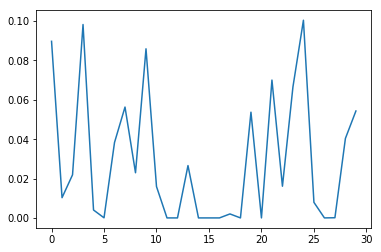

In [36]:
number = 0
value = []

for i in range(30):
    value.append(divide_fourier(normalization(rnd_data[number * 30 + i]), 3)[:200, 0].max())
    
print(np.array(value) >= 0.02)
plt.plot(value)

In [90]:
fourier_max.sort()
a = fourier_max
mus_1 = np.mean(a[:5])
mus_2 = np.mean(a[5:])
sig_1 = np.std(a[:5])
sig_2 = np.std(a[5:])
print(mus_1, mus_2)
print(sig_1, sig_2)


0.009311758 0.06063099
0.0015423105 0.033556275


In [108]:
fourier_max[9]

0.01111755

In [107]:
pb_1 = PBF(fourier_max[9], mus_1, sig_1)
pb_2 = PBF(fourier_max[9], mus_2, sig_2)
print(pb_1, pb_2)

258.66535298959883 11.888737022373936


In [114]:
pb_1 = ZF(fourier_max[2], mus_1, sig_1)
pb_2 = ZF(fourier_max[2], mus_2, sig_2)
print(pb_1, pb_2)

0.0 0.07525195917993296


In [84]:
dis_6_1 = (vowel_1 - fourier_mean[6])
dis_6_2 = (vowel_2 - fourier_mean[6])
print(dis_6_1, dis_6_2)

-0.02002897 0.031290263


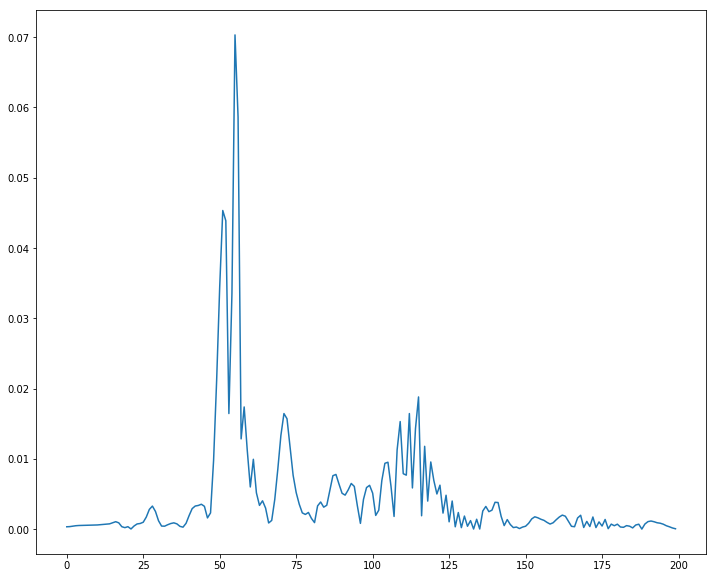

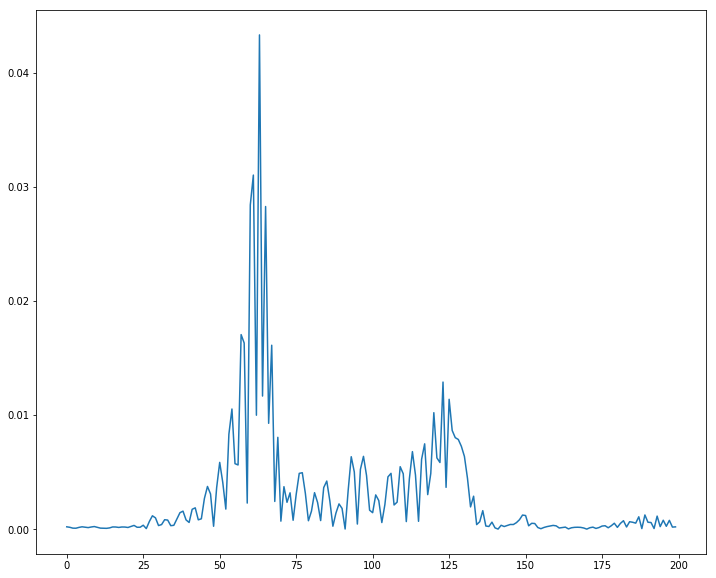

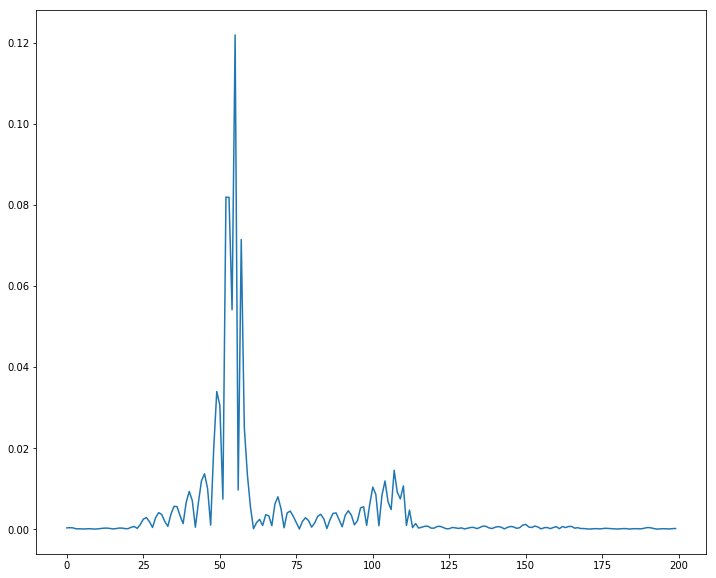

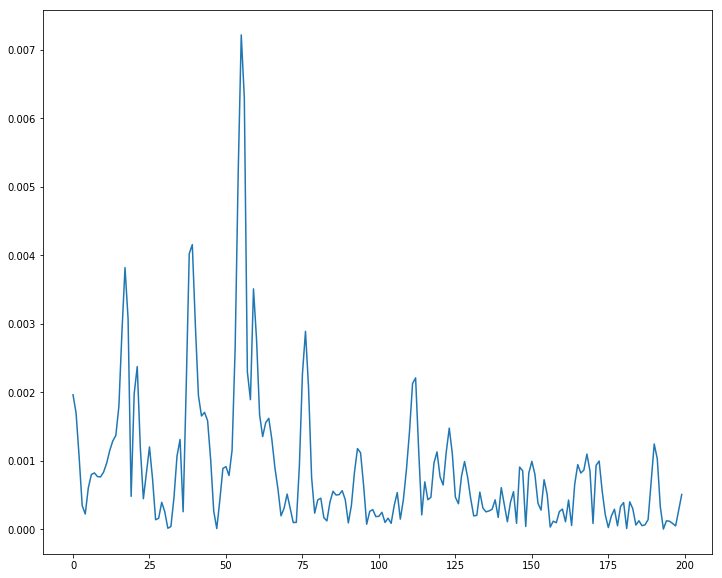

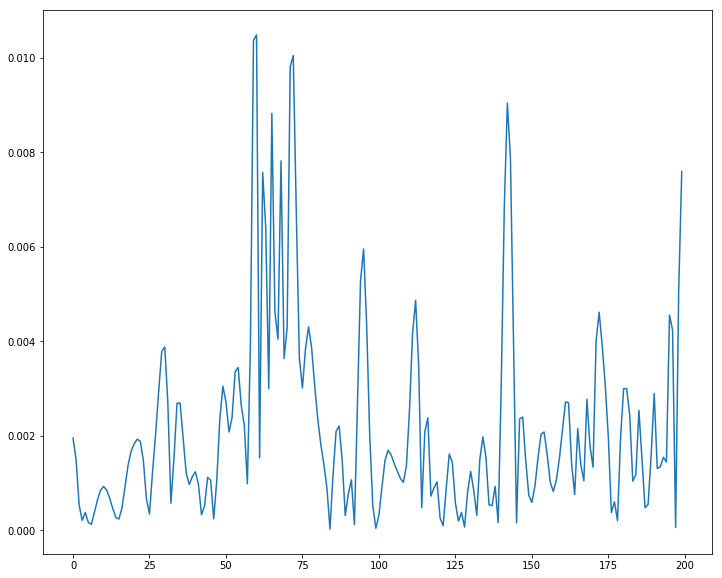

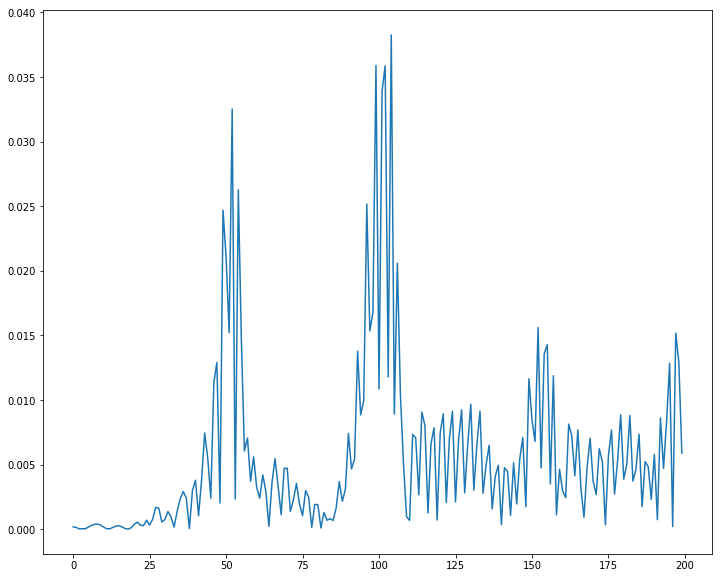

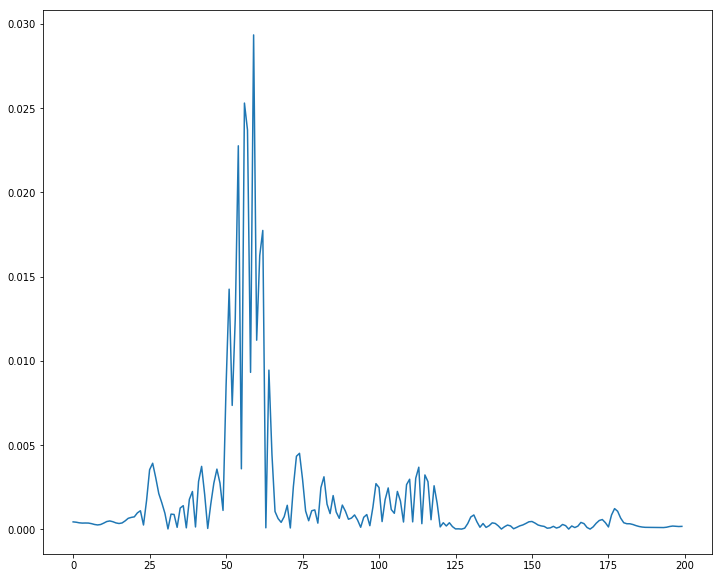

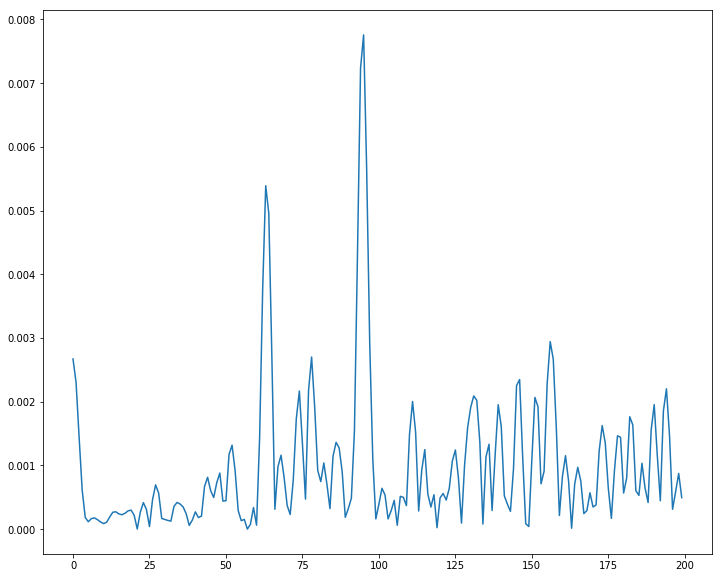

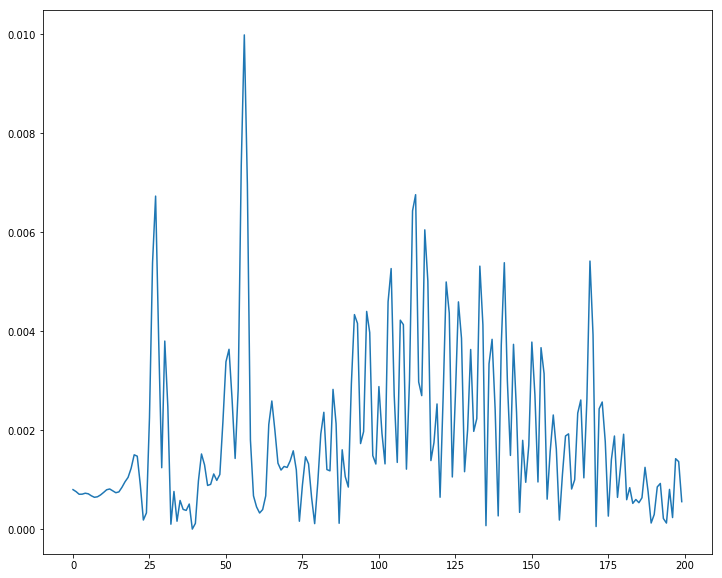

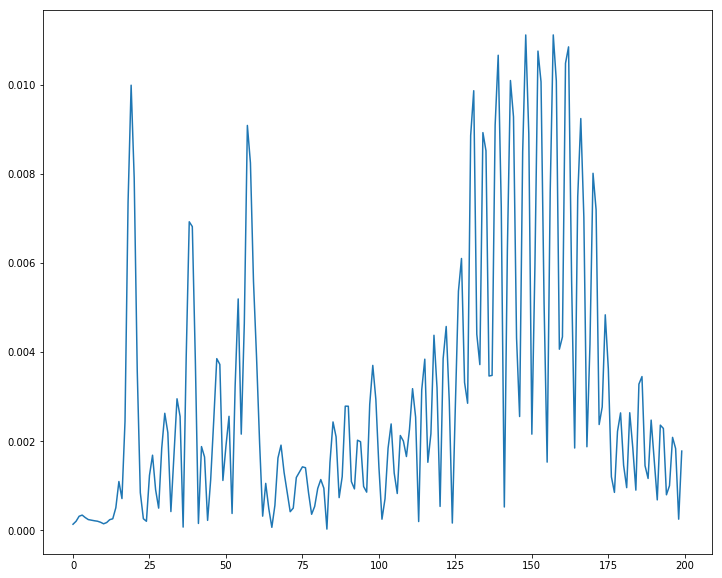

In [71]:
for n in norm_data:
    plt.figure(figsize=(12, 10))
    plt.plot(divide_fourier(n, 3)[:200, 0])

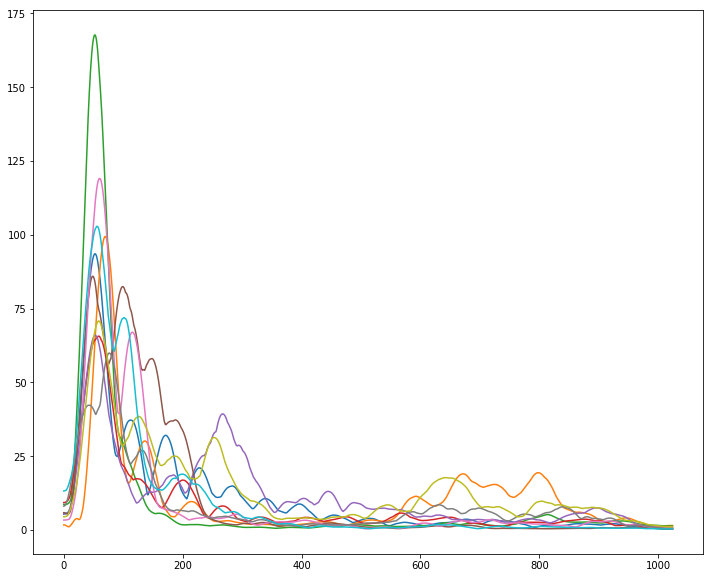

In [24]:
plt.figure(figsize=(12, 10))
for n in norm_data:
    p = stft_sum(n)
    
    plt.plot(p)

In [96]:
# 영일육 vs 이오

numbers = [0, 1, 2, 5, 6]

for n in numbers:
    #plt.figure(figsize=(10, 9))
    #plt.ylim([0, 0.1])
    print(divide_fourier_2(norm_data[n], 3)[:200, 2].sum())
    #plt.plot(stft_sum(norm_data[n]))

0.47142667
0.35773617
0.19094907
0.29507113
0.3745473


In [41]:
def left_last_classification(value):
    """
    0, 1, 6 = 0
    2, 5 = 1
    """
    disicion_boundary = 0.48
    res = divide_fourier_2(value, 3)[:200, 2].sum()
    #print(res)
    if res > disicion_boundary:
        return 0
    else:
        return 1

In [166]:
left_last_classification(slicing(norm_data[6]))

0

In [167]:
numbers = [0, 1, 2, 5, 6]
for i in numbers:
    for j in range(30):
        res = left_last_classification(slicing(norm_rnd_data[i * 30 + j]))
        print(i, res)

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0
6 0


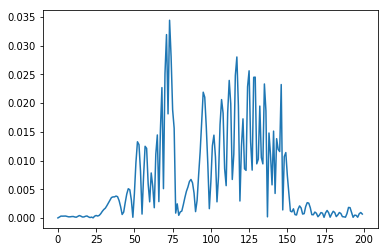

In [126]:
plt.plot(divide_fourier_2(slicing(norm_rnd_data[1 * 30 + 0]), 3)[:200, 2])

In [177]:
# 2 vs 5

numbers = [2, 5]

for i in numbers:
    #plt.figure(figsize=(16, 9))
    #plt.ylim([0, 0.3])
    #plt.plot(divide_fourier(slicing(norm_data[i]), 3)[:200, 0])
    for j in range(30):
        
        print(divide_fourier(slicing(norm_rnd_data[i * 30 + j]), 3)[:200, 0].max())

0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.2264628
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869
0.10059869


In [42]:
def two_five_classification(value):
    """
    2 : 0
    5 : 1
    """
    disicion_boundary = 0.15
    
    res = divide_fourier(value, 3)[:200, 0].max()
    if res > disicion_boundary:
        return 0
    else:
        return 1

In [179]:
numbers = [2, 5]

for i in numbers:
    #plt.figure(figsize=(16, 9))
    #plt.ylim([0, 0.3])
    #plt.plot(divide_fourier(slicing(norm_data[i]), 3)[:200, 0])
    for j in range(30):
        
        print(i, two_five_classification(slicing(norm_rnd_data[i * 30 + j])))

2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
2 0
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1
5 1


<BarContainer object of 5 artists>

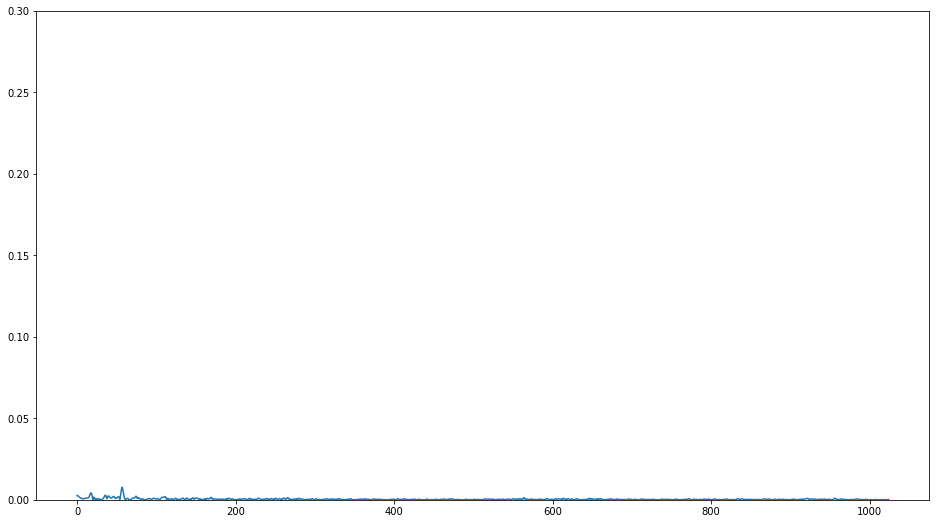

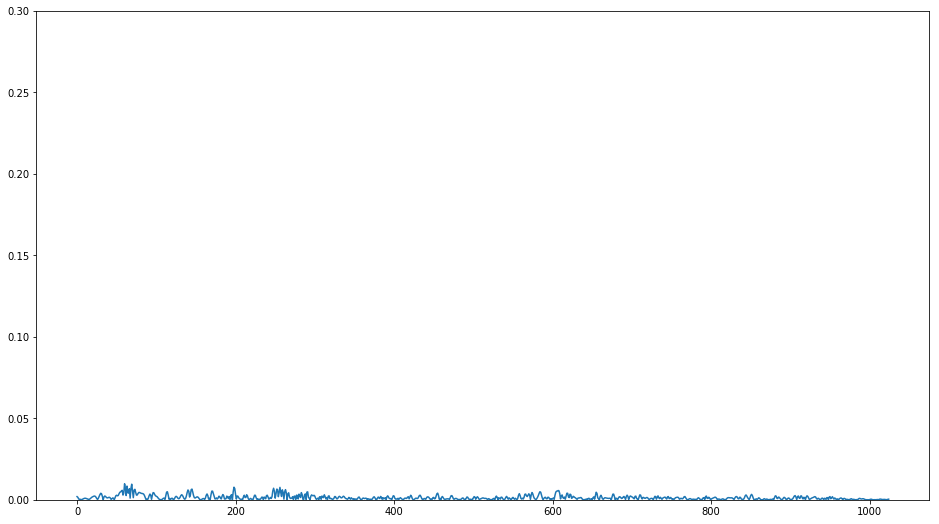

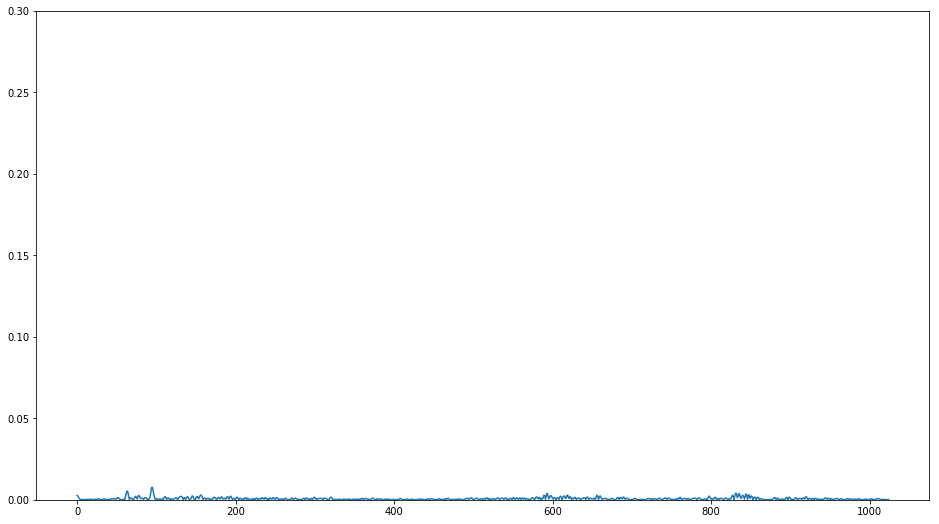

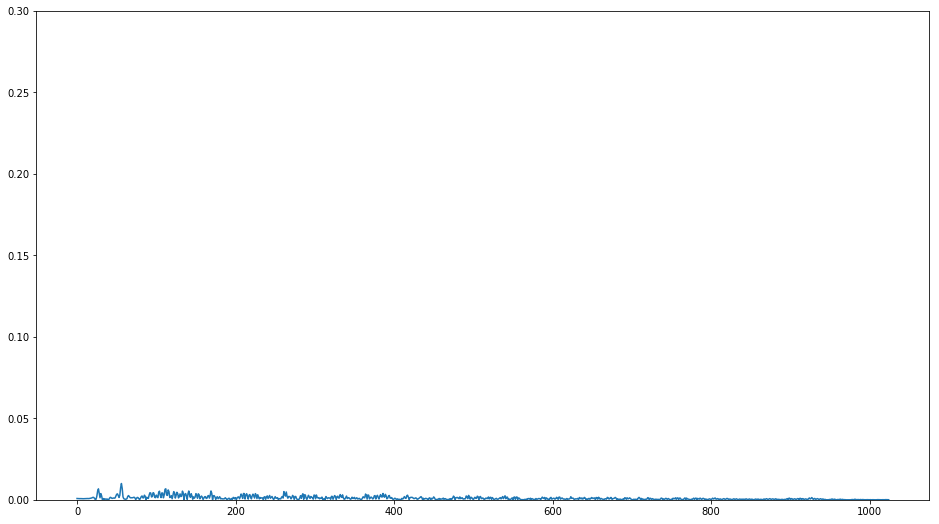

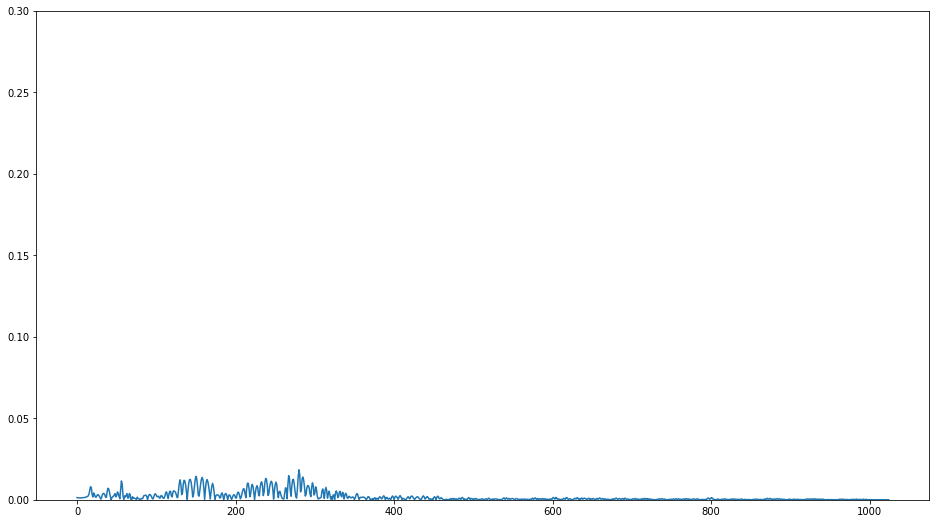

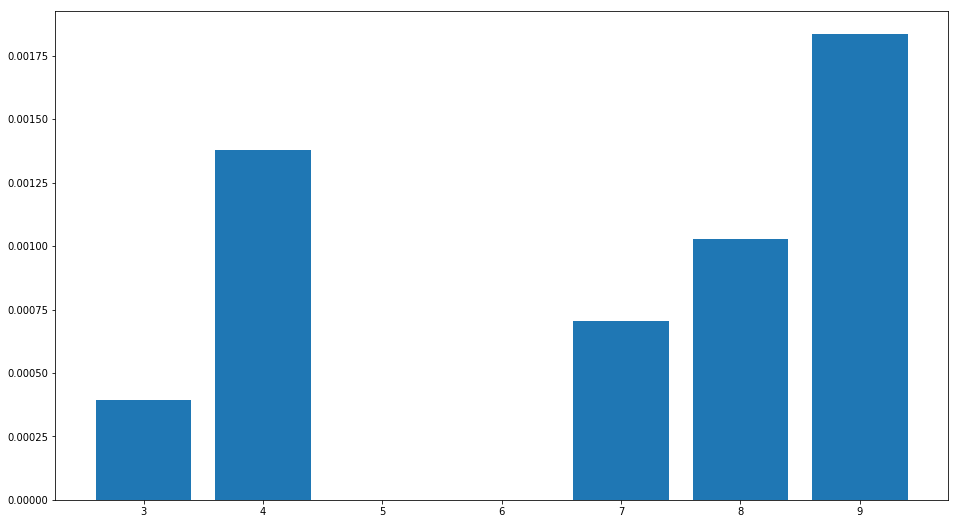

In [193]:
# 3 4 7 vs 8 9

numbers = [3, 4, 7, 8, 9]
a = []
for n in numbers:
    plt.figure(figsize=(16, 9))
    plt.ylim([0, 0.3])
    plt.plot(divide_fourier(slicing(norm_data[n]), 3)[:, 0])
    a.append(divide_fourier(slicing(norm_data[n]), 3)[:, 0].mean())

plt.figure(figsize=(16, 9))
plt.bar(numbers, a)

In [43]:
def right_second_classification(value):
    """
    3, 7, 8 : 0
    4, 9 : 1
    """
    
    disicion_boundary = 0.00123
    res = divide_fourier(value, 3)[:, 0].mean()
    
    if res < disicion_boundary:
        return 0
    else:
        return 1


In [195]:
numbers = [3, 4, 7, 8, 9]

for i in numbers:
    #plt.figure(figsize=(16, 9))
    #plt.ylim([0, 0.3])
    #plt.plot(divide_fourier(slicing(norm_data[i]), 3)[:200, 0])
    for j in range(30):
        
        print(i, right_second_classification(slicing(norm_rnd_data[i * 30 + j])))

3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
4 1
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
7 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
8 0
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1


/home/user/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  axis=0)[:stft_matrix.shape[0]]


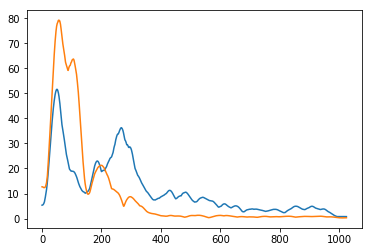

In [196]:
# 4 vs 9

numbers = [4, 9]

for n in numbers:
    plt.plot(stft_sum(slicing(norm_data[n])))

In [44]:
def four_nine_classification(value):
    """
    4 : 0
    9 : 1
    """
    disicion_boundary = 20
    res = stft_sum(value)[300]
    
    if res > disicion_boundary:
        return 0
    else:
        return 1

In [200]:
numbers = [4, 9]

for i in numbers:
    #plt.figure(figsize=(16, 9))
    #plt.ylim([0, 0.3])
    #plt.plot(divide_fourier(slicing(norm_data[i]), 3)[:200, 0])
    for j in range(30):
        
        print(i, four_nine_classification(slicing(norm_rnd_data[i * 30 + j])))

4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
4 0
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1
9 1


<BarContainer object of 3 artists>

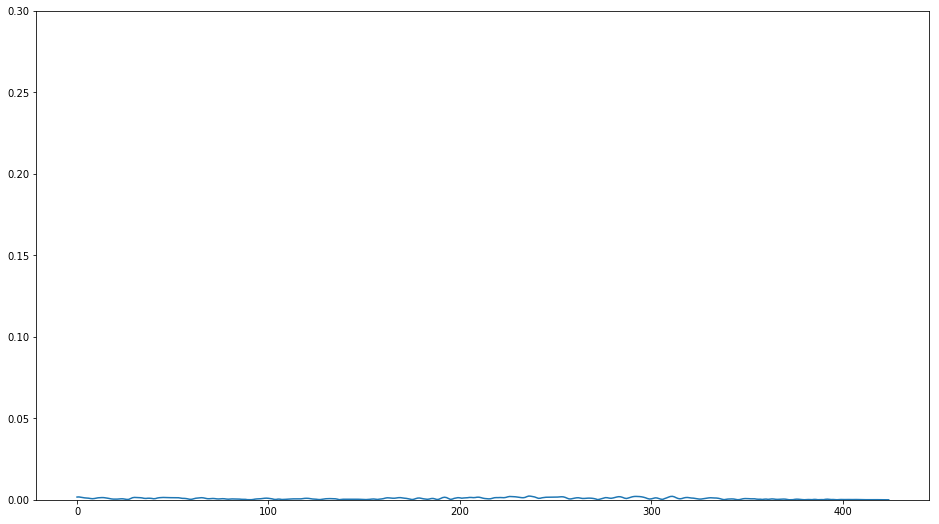

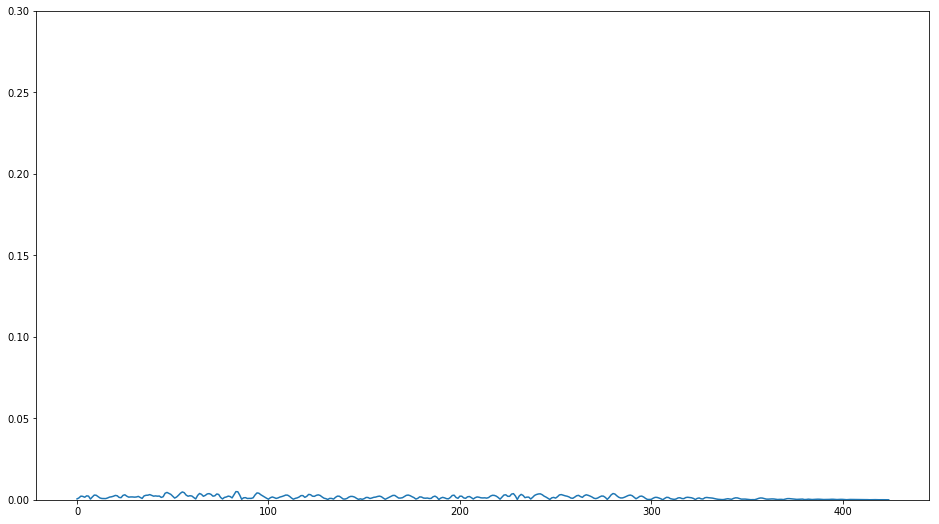

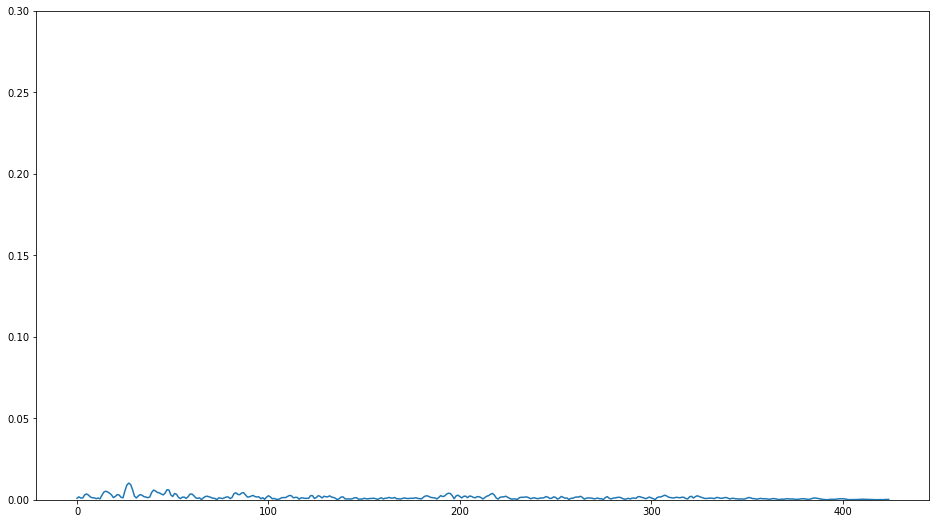

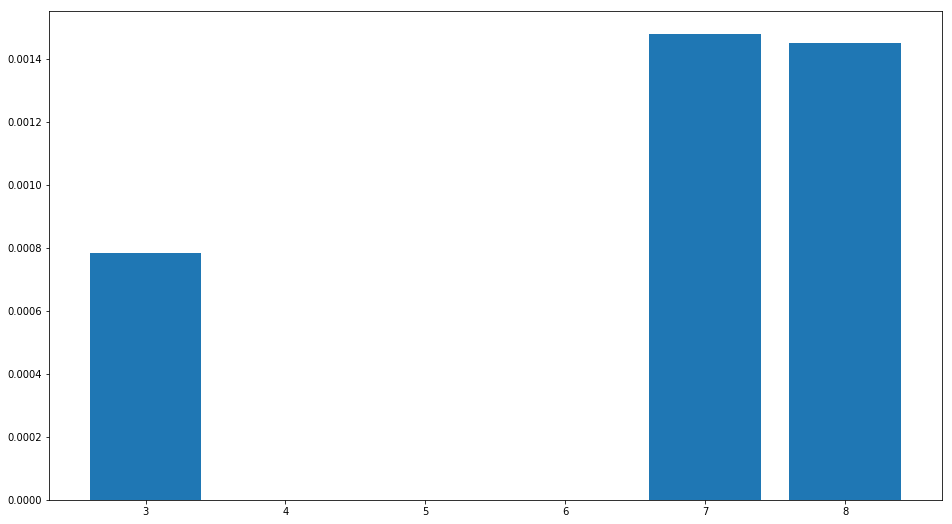

In [224]:
# 3 vs 7, 8

numbers = [3, 7, 8]
a = []
for n in numbers:
    plt.figure(figsize=(16, 9))
    plt.ylim([0, 0.3])
    plt.plot(divide_fourier(slicing(norm_data[n]), 3)[600:, 1])
    a.append(divide_fourier(slicing(norm_data[n]), 3)[600:, 1].mean())
    
plt.figure(figsize=(16, 9))
plt.bar(numbers, a)

In [45]:
def three_seven_eight_classification(value):
    """ 
    3 : 0
    7, 8 : 1
    """
    disicion_boundary = 0.0012
    res = divide_fourier(value, 3)[600:, 1].mean()
    
    if res < disicion_boundary:
        return 0
    else:
        return 1
    

In [226]:
numbers = [3, 7, 8]

for i in numbers:
    #plt.figure(figsize=(16, 9))
    #plt.ylim([0, 0.3])
    #plt.plot(divide_fourier(slicing(norm_data[i]), 3)[:200, 0])
    for j in range(30):
        
        print(i, three_seven_eight_classification(slicing(norm_rnd_data[i * 30 + j])))

3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
3 0
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
7 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1
8 1


In [46]:
# classification

def classification(values):
    
    res = []
    
    for v in values:
        if vowel_classication(slicing(normalization(v))):
            # 0 1 2 5 6
            if left_last_classification(slicing(normalization(v))):
                # 2 5
                if two_five_classification(slicing(normalization(v))):
                    # 5
                    res.append(5)
                else:
                    # 2
                    res.append(2)
            else:
                # 0 1 6
                if zero_classification(v):
                    # 0
                    res.append(0)
                else:
                    # 1 6
                    if one_six_classification(v):
                        res.append(6)
                    else:
                        res.append(1)
        else:
            # 3 4 7 8 9
            if right_second_classification(slicing(normalization(v))):
                # 4, 9
                if four_nine_classification(slicing(normalization(v))):
                    res.append(9)
                else:
                    res.append(4)
            else:
                # 3, 7, 8
                if three_seven_eight_classification(slicing(normalization(v))):
                    # 7, 8
                    if seven_eight_classification(v):
                        res.append(8)
                    else:
                        res.append(7)
                else:
                    res.append(3)
                    
    return res
        

In [244]:
res = classification(rnd_data)
print(res)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]


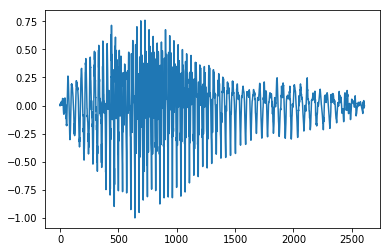

In [13]:
# 0 norm

plt.plot(normalization(raw_data[0]))

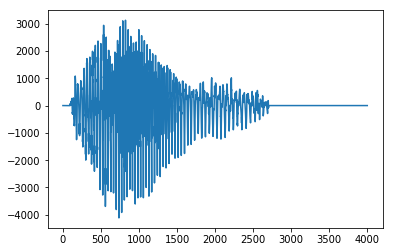

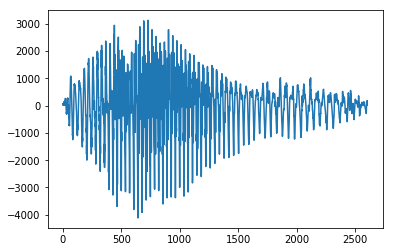

In [16]:
# 0 slicing
plt.plot(rnd_data[0])
plt.figure()
plt.plot(slicing(rnd_data[0]))

In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import IPython
import os
import numpy as np

%matplotlib inline

In [47]:
base_path = './data/example/zero.wav'

sr, sample = wavfile.read(base_path)
ans = classification(sample)
print(ans)

TypeError: object of type 'numpy.int16' has no len()